In [0]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt

In [0]:
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['matches.csv'].decode('utf-8')))
df

Saving matches.csv to matches.csv


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [0]:
matches=pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [0]:
# Q1 : Find the name of the player who won max number of man of the matches award in the period of 2010 and 2015 while plating in Mumbai [Easy]

mumbai=matches[matches['city']=='Mumbai']   #Getting the matches played in Mumbai
season_range=mumbai[(mumbai['season']>=2010) & (mumbai['season']<=2015)]  # Filtering season between 2010 and 2015
season_range['player_of_match'].value_counts().head(1).index[0]   # Finding player of the match by counting the man of the matches of each player and getting the top player

'KA Pollard'

In [0]:
# Q2 : Find the team who has won most number of matches with victory margin > 50 [Easy]

GT50=matches[matches['win_by_runs']>50]   # Finding the matches greater than 50
GT50['winner'].value_counts().head(1)     # Counting the winners and getting the top team

Chennai Super Kings    11
Name: winner, dtype: int64

In [0]:
# Q3 : Write a function which will take 2 inputs, team 1 and team 2 and their record against each other

# For example if team1->KKR and team2->CSK

# The output should be like KKR 2(matches won by KKR) and CSK 5(matches won by CSK)[Medium]

def team_comparison(first_team,second_team):
  team1=matches[(matches['team1']==first_team) | (matches['team1']==second_team)]  # Filtering the 'team1' column by first_team or second_team
  team2=team1[(team1['team2']==first_team) | (team1['team2']==second_team)]        # And then filtering 'team2' column by first_team or second_team 
  results=team2['winner'].value_counts()                                           # Counting the winners
  output= "{} won {} matches and {} won {} matches".format(first_team,results[first_team],second_team, results[second_team])   # Generating the output string
  return output

**Some Examples of the above function**

In [0]:
team_comparison('Kolkata Knight Riders','Chennai Super Kings')    

'Kolkata Knight Riders won 6 matches and Chennai Super Kings won 10 matches'

In [0]:
team_comparison('Mumbai Indians','Royal Challengers Bangalore')

'Mumbai Indians won 13 matches and Royal Challengers Bangalore won 8 matches'

Text(0.5, 0, 'Wickets')

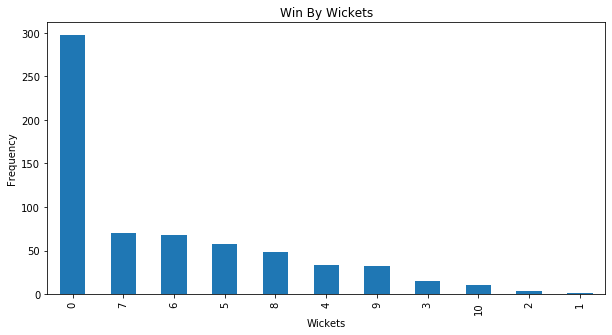

In [0]:
# Q4 : Plot a bar graph on win_by_wickets col. [Easy]

matches['win_by_wickets'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Win By Wickets')
plt.ylabel('Frequency')
plt.xlabel('Wickets')


In [0]:
# Q5 : Write a function which will accept a team name as input and will return it's win percentage after winning the toss[Difficult] 

def win_percent_after_winning_toss(team):
  toss_win=matches[matches['toss_winner']==team]      # Filtering the toss_winner column by the team provided
  win_count=toss_win['winner'].value_counts()         # Getting the win count of all the teams that played with the team provided
  return win_count[team]/sum(win_count)*100           # returning the win percentage

**Some example outputs of the above function**

In [0]:
win_percent_after_winning_toss('Kolkata Knight Riders')

56.41025641025641

In [0]:
win_percent_after_winning_toss('Chennai Super Kings')

63.63636363636363

In [0]:
win_percent_after_winning_toss('Mumbai Indians')

56.470588235294116